In [2]:
import joblib
import json
import pandas
import numpy
import seaborn

import sklearn.model_selection
import sklearn.neural_network
import sklearn.metrics

import matplotlib.pyplot
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Instructions

- Read **the train data** from the CSV file and properly set the index


In [12]:
data_train = pandas.read_csv('../exp1_artificial_neural_network/data/features.train.csv').set_index('id')
data_train

employment  own_telephone  foreign_worker  installment_commitment  \
id                                                                       
495         2.0            0.0             1.0                     1.0   
296         1.0            0.0             1.0                     0.0   
1           2.0            0.0             1.0                     1.0   
38          2.0            1.0             1.0                     1.0   
568         3.0            1.0             1.0                     3.0   
..          ...            ...             ...                     ...   
836         2.0            0.0             1.0                     3.0   
192         2.0            1.0             1.0                     3.0   
630         2.0            0.0             1.0                     1.0   
560         4.0            1.0             1.0                     3.0   
685         2.0            1.0             1.0                     3.0   

     residence_since  existing_credits  num_dependents  duration  \
id                                                                 
495              3.0               0.0             0.0  0.273882   
296              3.0               0.0             0.0 -0.724523   
1                1.0               0.0             0.0  2.270692   
38               1.0               0.0             0.0 -0.890924   
568              0.0               1.0             1.0  2.270692   
..               ...               ...             ...       ...   
836              1.0               0.0             0.0 -0.724523   
192              1.0               0.0             1.0  0.523483   
630              3.0               0.0             0.0  0.273882   
560              3.0               0.0             1.0  0.273882   
685              3.0               0.0             1.0  3.269098   

     credit_amount       age  ...  property_magnitude_life insurance  \
id                            ...                                      
495      -0.080100 -1.359664  ...                                0.0   
296       0.526828 -1.359664  ...                                0.0   
1         0.988078 -1.185843  ...                                0.0   
38       -0.720284  0.117817  ...                                0.0   
568       0.275237  0.465460  ...                                0.0   
..             ...       ...  ...                                ...   
836      -0.842826 -1.272753  ...                                0.0   
192       0.252102  0.030907  ...                                0.0   
630       0.159924 -0.664379  ...                                0.0   
560      -0.091667  1.160745  ...                                0.0   
685       1.196292 -0.142915  ...                                0.0   

     property_magnitude_car  property_magnitude_real estate  \
id                                                            
495                     1.0                             0.0   
296                     1.0                             0.0   
1                       0.0                             1.0   
38                      1.0                             0.0   
568                     1.0                             0.0   
..                      ...                             ...   
836                     1.0                             0.0   
192                     1.0                             0.0   
630                     1.0                             0.0   
560                     0.0                             0.0   
685                     0.0                             0.0   

     other_payment_plans_none  other_payment_plans_stores  \
id                                                          
495                       1.0                         0.0   
296                       1.0                         0.0   
1                         1.0                         0.0   
38                        1.0                         0.0   
568                       1.0     

# Instructions

- Split the data into a train data set and a validation data set using `sklearn.model_selection.train_test_split` with the following configurations:
```
    train_size   = 0.75
    shuffle      = True 
    random_state = 4
```


In [16]:
data_train, data_validation = sklearn.model_selection.train_test_split(
    data_train,
     train_size   = 0.75,
    shuffle      = True,
    random_state = 4,
)

In [17]:
data_train

employment  own_telephone  foreign_worker  installment_commitment  \
id                                                                       
242         4.0            0.0             1.0                     2.0   
900         4.0            1.0             1.0                     1.0   
477         3.0            0.0             1.0                     3.0   
952         1.0            0.0             1.0                     2.0   
568         3.0            1.0             1.0                     3.0   
..          ...            ...             ...                     ...   
472         2.0            0.0             1.0                     3.0   
72          4.0            1.0             1.0                     2.0   
606         2.0            1.0             1.0                     2.0   
930         1.0            0.0             0.0                     3.0   
260         2.0            0.0             1.0                     1.0   

     residence_since  existing_credits  num_dependents  duration  \
id                                                                 
242              3.0               1.0             1.0  2.270692   
900              3.0               0.0             0.0 -0.391721   
477              1.0               0.0             0.0  0.273882   
952              3.0               0.0             0.0  0.273882   
568              0.0               1.0             1.0  2.270692   
..               ...               ...             ...       ...   
472              2.0               0.0             0.0 -0.974124   
72               3.0               1.0             1.0 -1.057325   
606              1.0               0.0             0.0  0.273882   
930              0.0               0.0             0.0  0.273882   
260              1.0               0.0             0.0 -0.724523   

     credit_amount       age  ...  property_magnitude_life insurance  \
id                            ...                                      
242       0.501524 -1.012021  ...                                0.0   
900      -0.214210  0.639281  ...                                1.0   
477       0.699255 -0.925111  ...                                0.0   
952       0.323675 -0.664379  ...                                0.0   
568       0.275237  0.465460  ...                                0.0   
..             ...       ...  ...                                ...   
472      -0.926690 -0.664379  ...                                0.0   
72       -0.742334  1.334567  ...                                0.0   
606       0.472967  3.333512  ...                                0.0   
930      -0.531590 -1.012021  ...                                1.0   
260      -0.564124 -0.751289  ...                                0.0   

     property_magnitude_car  property_magnitude_real estate  \
id                                                            
242                     0.0                             0.0   
900                     0.0                             0.0   
477                     1.0                             0.0   
952                     1.0                             0.0   
568                     1.0                             0.0   
..                      ...                             ...   
472                     1.0                             0.0   
72                      0.0                             0.0   
606                     0.0                             1.0   
930                     0.0                             0.0   
260                     0.0                             1.0   

     other_payment_plans_none  other_payment_plans_stores  \
id                                                          
242                       1.0                         0.0   
900                       0.0                         0.0   
477                       0.0                         0.0   
952                       1.0                         0.0   
568                       1.0     

In [18]:
data_validation

employment  own_telephone  foreign_worker  installment_commitment  \
id                                                                       
106         4.0            1.0             1.0                     1.0   
527         3.0            0.0             1.0                     1.0   
264         4.0            0.0             0.0                     2.0   
563         2.0            1.0             1.0                     0.0   
825         4.0            1.0             1.0                     3.0   
..          ...            ...             ...                     ...   
189         2.0            1.0             1.0                     0.0   
152         2.0            0.0             1.0                     3.0   
218         2.0            0.0             1.0                     1.0   
170         4.0            0.0             1.0                     3.0   
399         2.0            0.0             1.0                     3.0   

     residence_since  existing_credits  num_dependents  duration  \
id                                                                 
106              3.0               1.0             1.0 -0.225321   
527              0.0               1.0             1.0 -1.390127   
264              3.0               1.0             1.0 -0.890924   
563              3.0               0.0             0.0  1.272287   
825              2.0               1.0             0.0  0.024281   
..               ...               ...             ...       ...   
189              3.0               1.0             0.0 -0.225321   
152              0.0               0.0             0.0  1.272287   
218              1.0               0.0             0.0  0.273882   
170              2.0               1.0             1.0 -0.474922   
399              0.0               1.0             0.0  0.273882   

     credit_amount       age  ...  property_magnitude_life insurance  \
id                            ...                                      
106       1.171350  0.291639  ...                                0.0   
527      -0.619792  0.552371  ...                                0.0   
264      -0.718115 -0.316736  ...                                0.0   
563       3.315297  0.117817  ...                                0.0   
825      -0.584005 -0.490557  ...                                0.0   
..             ...       ...  ...                                ...   
189       0.009548 -0.229825  ...                                0.0   
152       0.950846 -1.012021  ...                                0.0   
218      -0.071063 -1.012021  ...                                0.0   
170      -0.819691 -0.229825  ...                                0.0   
399      -0.615093  0.639281  ...                                0.0   

     property_magnitude_car  property_magnitude_real estate  \
id                                                            
106                     0.0                             0.0   
527                     0.0                             1.0   
264                     0.0                             1.0   
563                     0.0                             0.0   
825                     1.0                             0.0   
..                      ...                             ...   
189                     1.0                             0.0   
152                     1.0                             0.0   
218                     0.0                             1.0   
170                     1.0                             0.0   
399                     0.0                             1.0   

     other_payment_plans_none  other_payment_plans_stores  \
id                                                          
106                       0.0                         0.0   
527                       1.0                         0.0   
264                       1.0                         0.0   
563                       1.0                         0.0   
825                       1.0     

# Instructions

- Instantiate a `sklearn.neural_network.MLPClassifier` model with the following configurations
```
    hidden_layer_sizes    = (20, 10),
    solver                = 'sgd', 
    activation            = 'logistic',
    alpha                 = 0.0,  
    batch_size            = 32,
    learning_rate         = 'constant',
    learning_rate_init    = 0.1,
    max_iter              = 1000,
    momentum              = 0.0, 
    nesterovs_momentum    = False, 
    validation_fraction   = 0.0, 
    shuffle               = True,
    random_state          = 0
```


In [19]:
model = sklearn.neural_network.MLPClassifier(
    hidden_layer_sizes    = (20, 10),
    solver                = 'sgd', 
    activation            = 'logistic',
    alpha                 = 0.0,  
    batch_size            = 32,
    learning_rate         = 'constant',
    learning_rate_init    = 0.1,
    max_iter              = 1000,
    momentum              = 0.0, 
    nesterovs_momentum    = False, 
    validation_fraction   = 0.0, 
    shuffle               = True,
    random_state          = 0
)
model

MLPClassifier(activation='logistic', alpha=0.0, batch_size=32,
              hidden_layer_sizes=(20, 10), learning_rate_init=0.1,
              max_iter=1000, momentum=0.0, nesterovs_momentum=False,
              random_state=0, solver='sgd', validation_fraction=0.0)

# Instructions

- This part is to train the model while recording the losses and scores of both training and validation data sets
  - For each training iteration, use `partial_fit` to fit the model with the training data
  - Save the model that has the minimum validation loss
- Extend the following code base to append various metrics from partially trained models to `training_results`

```
data_train_features      = data_train.drop(['label'], axis='columns')
data_train_labels        = data_train['label']

data_validation_features = data_validation.drop(['label'], axis='columns')
data_validation_labels   = data_validation['label']

best_nll_validation = numpy.inf
training_results = []

for i in range(1, 400):

    model.partial_fit(
        X       = data_train_features,
        y       = data_train_labels,
        classes = [0, 1]
    )
    
    # insert code here
    nll_train = ...
    f1_train = ...
    nll_validation = ...
    f1_validation = ...

    training_results.append({
        'iter'            : i,
        'nll_train'       : nll_train,
        'f1_train'        : f1_train,
        'nll_validation'  : nll_validation,
        'f1_validation'   : f1_validation,
    })
        
    if nll_validation < best_nll_validation:
        best_nll_validation = nll_validation
        joblib.dump(model, './model/model.joblib')
        

training_results = pandas.DataFrame(training_results).set_index('iter')

```

In [23]:
data_train_features      = data_train.drop(['label'], axis='columns')
data_train_labels        = data_train['label']

data_validation_features = data_validation.drop(['label'], axis='columns')
data_validation_labels   = data_validation['label']

best_nll_validation = numpy.inf
training_results = []

for i in range(1, 400):

    model.partial_fit(
        X       = data_train_features,
        y       = data_train_labels,
        classes = [0, 1]
    )
    
    # insert code here
    nll_train = sklearn.metrics.f1_score(
        y_true = data_train_labels,
        y_pred = model.predict(data_train_features)
    )
    f1_train = sklearn.metrics.f1_score(
        y_true = data_train_labels,
        y_pred = model.predict(data_train_features)
    )
    nll_validation = sklearn.metrics.f1_score(
        y_true = data_validation_labels,
        y_pred = model.predict(data_validation_features)
    )
    f1_validation = sklearn.metrics.f1_score(
        y_true = data_validation_labels,
        y_pred = model.predict(data_validation_features)
    )

    training_results.append({
        'iter'            : i,
        'nll_train'       : nll_train,
        'f1_train'        : f1_train,
        'nll_validation'  : nll_validation,
        'f1_validation'   : f1_validation,
    })
        
    if nll_validation < best_nll_validation:
        best_nll_validation = nll_validation
        joblib.dump(model, './model/model.joblib')
        

training_results = pandas.DataFrame(training_results).set_index('iter')

In [8]:
training_results

nll_train  f1_train  nll_validation  f1_validation
iter                                                    
1      0.622768  0.000000        0.624556       0.000000
2      0.622420  0.000000        0.624286       0.000000
3      0.622263  0.000000        0.624190       0.000000
4      0.622136  0.000000        0.624123       0.000000
5      0.622012  0.000000        0.624059       0.000000
...         ...       ...             ...            ...
395    0.388156  0.741294        0.680979       0.597222
396    0.387693  0.741294        0.682077       0.597222
397    0.387226  0.741294        0.683181       0.593103
398    0.386757  0.741294        0.684290       0.593103
399    0.386284  0.741294        0.685405       0.593103

[399 rows x 4 columns]

# Instructions

- Plot the `nll_train` and `nll_validation` against `iter`
- Plot the `f1_train` and `f1_validation` against `iter`
- Find the training iteration that achieves the minimum validation loss
  - Hint: use `.idxmin` on `nll_validation`
- Also, use `.get_params`, `json.dump` to save the model configuration to  `./model/config.json`


<Axes: xlabel='iter', ylabel='nll_train'>

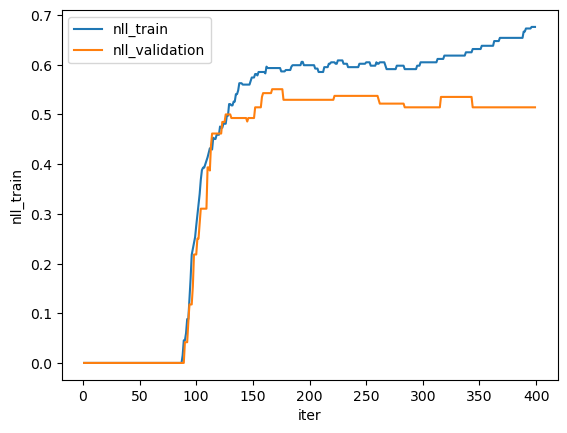

In [31]:
seaborn.lineplot(
    data = training_results,
    x = 'iter',
    y = 'nll_train',
    label='nll_train',
)
seaborn.lineplot(
    data = training_results,
    x = 'iter',
    y = 'nll_validation',
    label='nll_validation',
)

<Axes: xlabel='iter', ylabel='f1_train'>

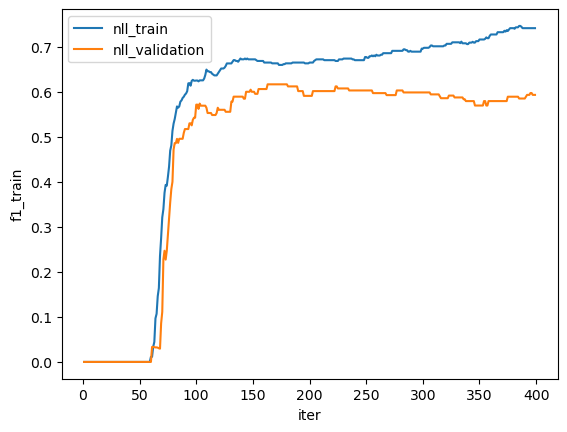

144

nll_train  f1_train  nll_validation  f1_validation
iter                                                    
140    0.466257  0.672087        0.551788       0.589147
141    0.465987  0.672087        0.551744       0.589147
142    0.465722  0.672087        0.551715       0.584615
143    0.465463  0.673854        0.551699       0.584615
144    0.465208  0.672043        0.551698       0.600000
145    0.464959  0.673854        0.551709       0.600000
146    0.464713  0.672043        0.551733       0.600000
147    0.464472  0.672043        0.551769       0.600000
148    0.464235  0.672043        0.551817       0.604651
149    0.464002  0.672043        0.551876       0.600000
150    0.463771  0.672043        0.551945       0.600000